##  Sentiment analysis of Youtube product comments (Xiaomi brand)


Steps for sentiment analysis: 

- <font color = gray>Extracting the data
- Cleaning the data
  - Tokenization
  - Removing stop words</font>
- TextBlob \& VADER
  - Classification:
	- positive (+1), negative (-1), neutral (0)
- Visualization
- Naive Bayes

To summerize: In this section, I will work with TextBlob \& VADER --> **Sentiment analysis**  | Barplot \& WordCloud --> **Visualization.**

## - Libraries

In [2]:
#%matplotlib inline #will make your plot outputs appear and be stored within the notebook.

######
import os, re, nltk, sys, math, random, string, requests
nltk.download('punkt')
nltk.download('stopwords') 
nltk.download('words')

######
import warnings #Prevent future/deprecation warnings from showing in output
warnings.filterwarnings(action='ignore')

#####Visualization#####
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #customize theme for plotting


#####Text##### 
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from stop_words import get_stop_words
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#####
from PIL import Image

######Vader #######
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize
from nltk.tokenize import TweetTokenizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#######
os.getcwd() 

[nltk_data] Downloading package punkt to /home/unina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/unina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /home/unina/nltk_data...
[nltk_data]   Package words is already up-to-date!


/home/unina/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


'/home/unina/PycharmProjects/Com_txt/Com_txt/code_folder'

In [4]:
#######
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report


In [5]:
####### Set global styles for plots #######
sns.set_style(style='white')
sns.set_context(context='notebook', font_scale=1.3, rc={'figure.figsize': (16,16)})

## - Corpus

In [6]:
my_corpus_textblob = open ("/home/unina/PycharmProjects/Com_txt/Com_txt/data_folder/my_corpus_textblob.txt", "r", encoding = "utf-8-sig").read()

#####
print(my_corpus_textblob[40:200]+"\n"+"########")   
text_blob = TextBlob(my_corpus_textblob, analyzer=NaiveBayesAnalyzer())
print(text_blob.sentiment)
    
words_blob = text_blob.words #tokenize words
print(words_blob[30:60])

#####As an example:
print("\n"+"Example: Good")
TextBlob("good").sentiment


l switching android next phone apple getting expensive bought mi experience comment ever bought version days ago know long time ago best thing phone part androi
########
Sentiment(classification='pos', p_pos=1.0, p_neg=4.835145221202805e-41)
['phone', 'part', 'android', 'one', 'program', 'get', 'latest', 'plus', 'clean', 'android', 'get', 'phone', 'calculator', 'originally', 'need', 'use', 'can', 'in', 'design', 'mostly', 'really', 'like', 'camera', 'good', 'especially', 'front', 'camera', 'person', 'average', 'user']

Example: Good


Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

## - Visualization

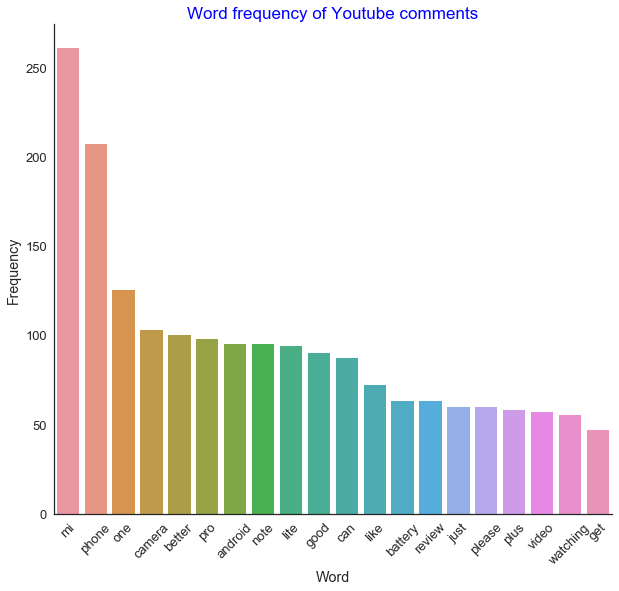

In [7]:
##### Visualization-Word frequency######
N_top = 20
word_dist = nltk.FreqDist(words_blob)
word_youtube = pd.DataFrame(word_dist.most_common(N_top),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,9))
plt.title('Word frequency of Youtube comments', fontsize = 17, color='blue')
sns.set_style("white")
ax = sns.barplot(x="Word",y="Frequency", data=word_youtube.head(20))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
sns.despine()#Remove axes

#####
plt.savefig('/home/unina/PycharmProjects/Com_txt/Com_txt/data_folder/Frequency_youtube_comment.png')#Just change .png to .pdf.



In [8]:
word_youtube.head(20)
#word_youtube.describe ()

,Word,Frequency
0,mi,261
1,phone,207
2,one,125
3,camera,103
4,better,100
5,pro,98
6,android,95
7,note,95
8,lite,94
9,good,90


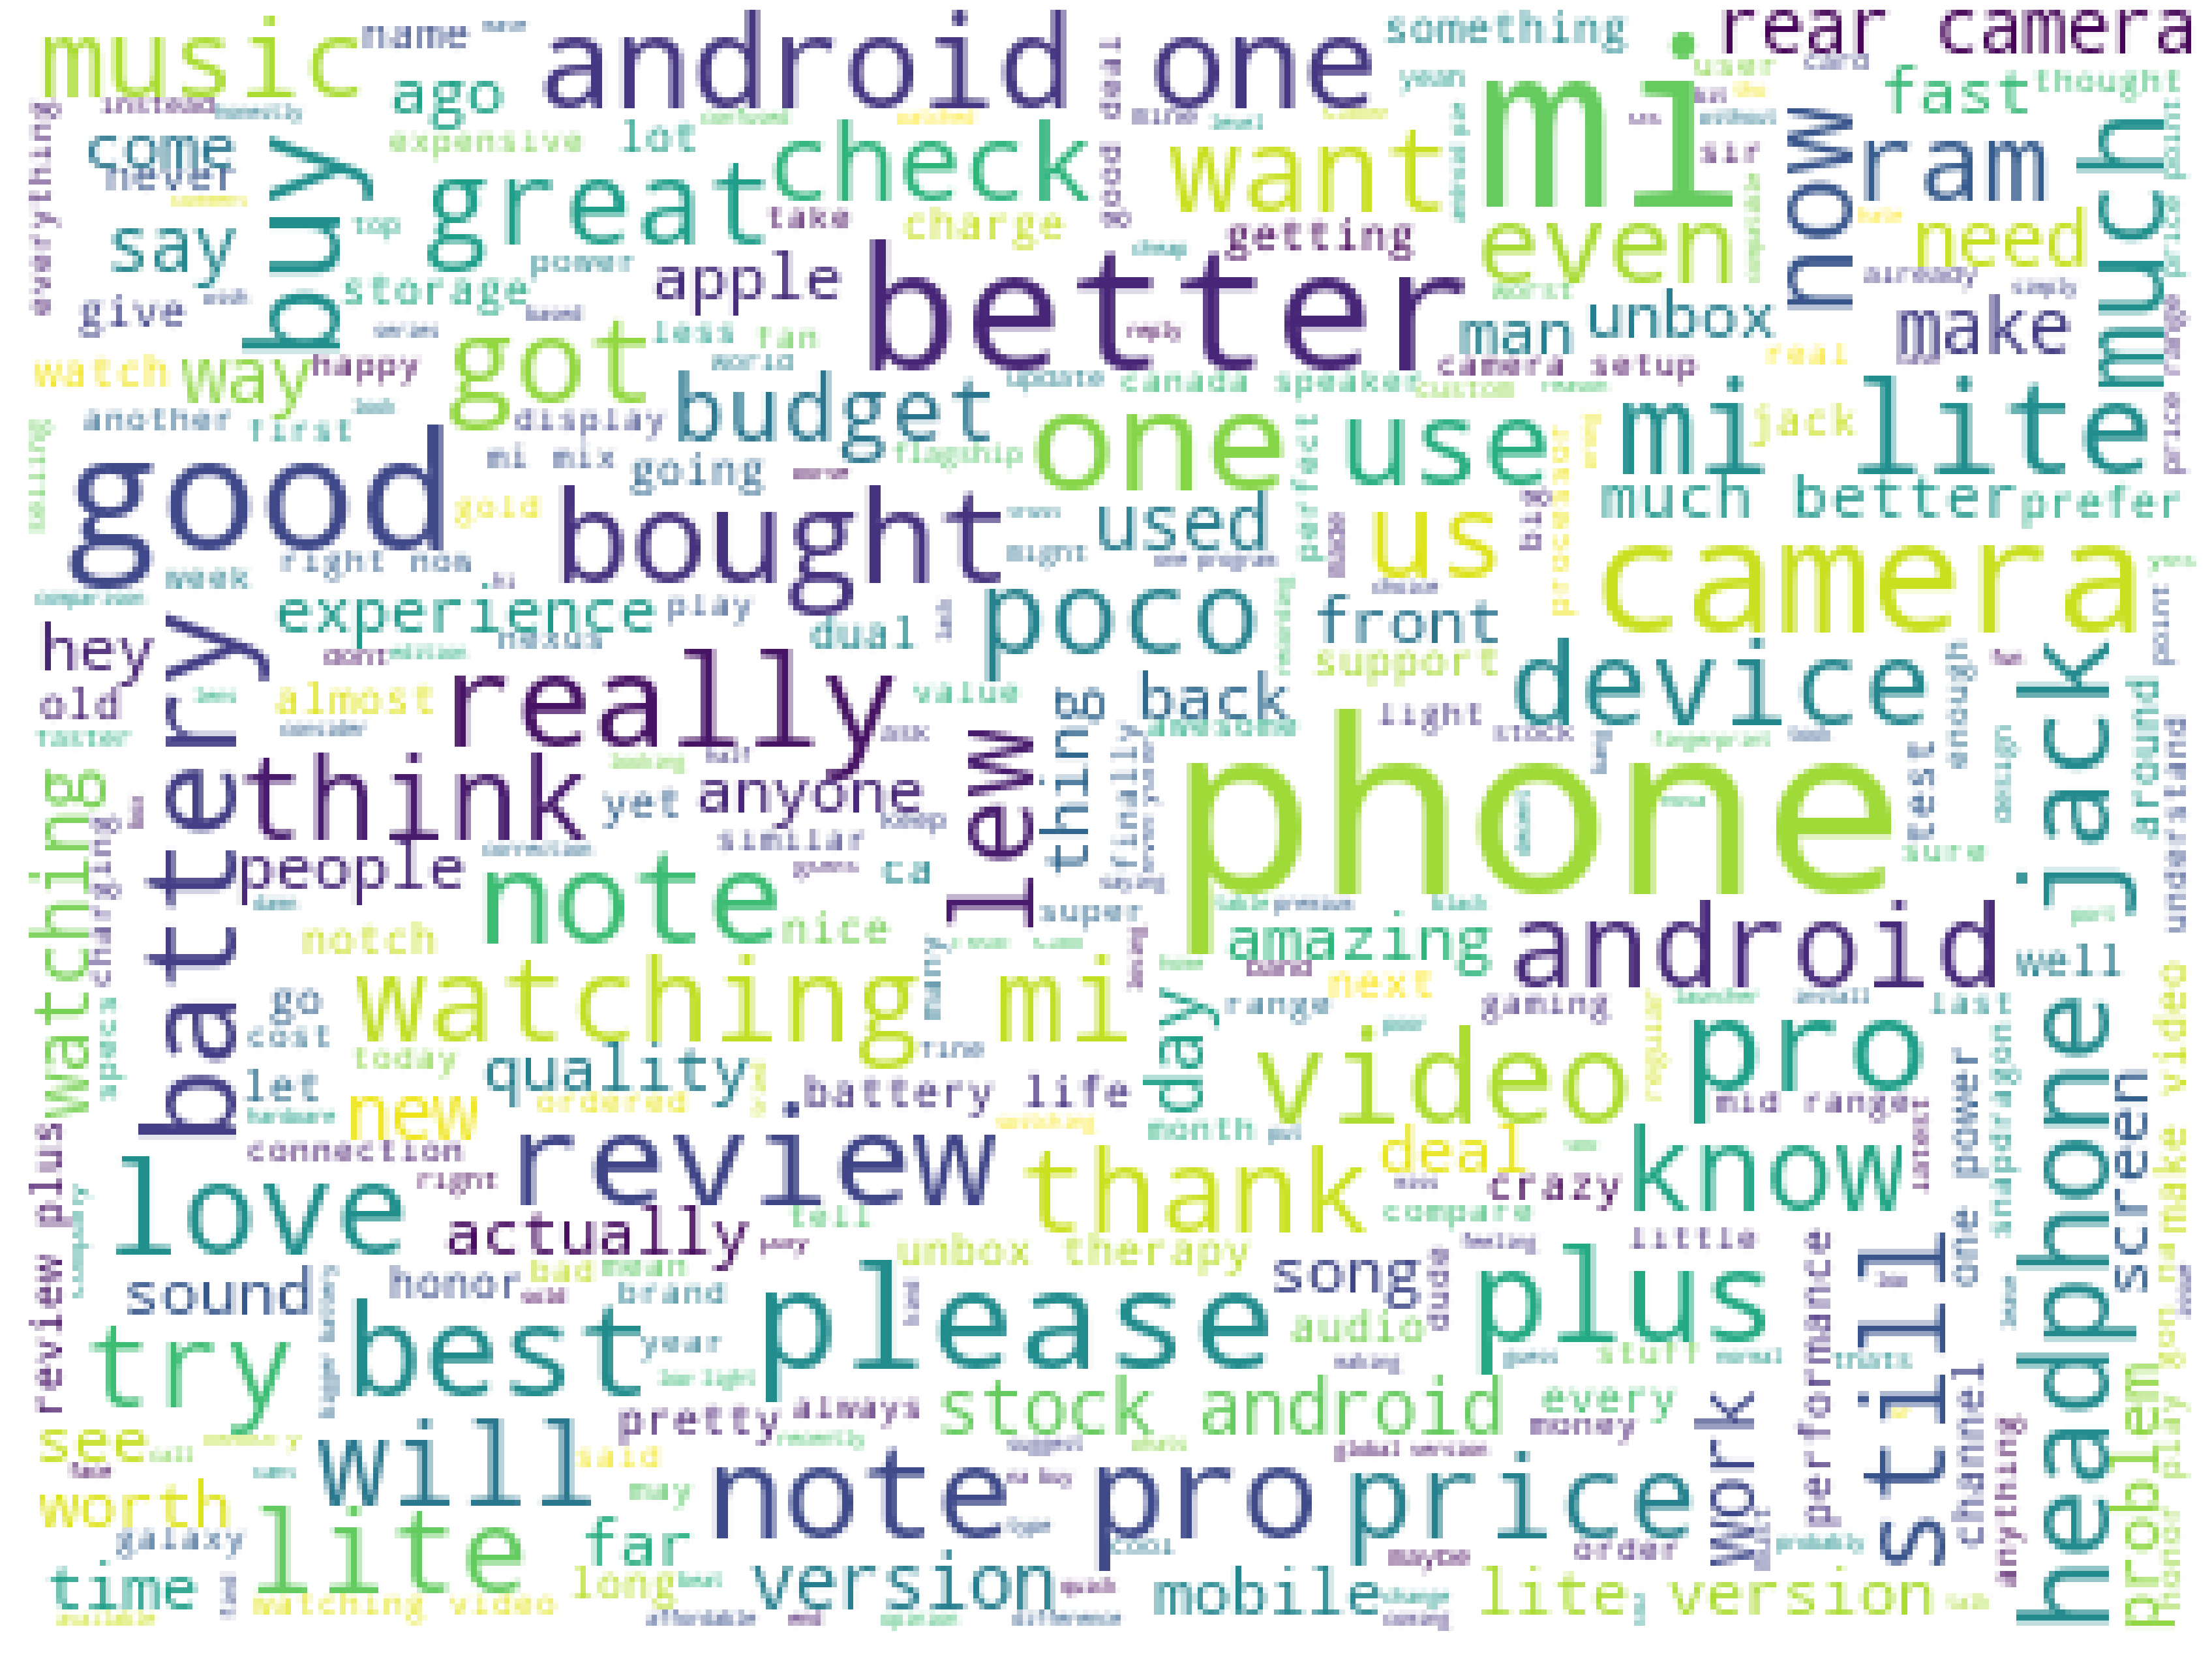

In [9]:
##### Wordcloud
def corpus_wordcloud(data,bgcolor,title):
    plt.figure(figsize = (60,60))
    corpus_wordcloud = WordCloud(background_color = bgcolor, max_words = 2000,  max_font_size = 45, height = 300)
    corpus_wordcloud.generate(' '.join(data))
    plt.imshow(corpus_wordcloud)
    plt.axis('off')
    plt.savefig('/home/unina/PycharmProjects/Com_txt/Com_txt/data_folder/WordCLoud_youtube_comment.png')


corpus_wordcloud(words_blob,'white','Common Words')


## - Sentiment anlysis_TextBlob

In [10]:
##### Sentiment analysis #####
bloblist = []

for sentence in words_blob:
    analysis = TextBlob(sentence)
    if analysis.sentiment[0] > 0:
        ('Positive')
    elif analysis.sentiment[0] < 0:
        ('Negative')
    else:
        ('Neutral')
    bloblist.append((sentence,analysis.sentiment.polarity, analysis.sentiment.subjectivity))
    
print(bloblist[:20])

[('mi', 0.0, 0.0), ('right', 0.2857142857142857, 0.5357142857142857), ('now', 0.0, 0.0), ('limited', -0.07142857142857142, 0.14285714285714285), ('cost', 0.0, 0.0), ('soul', 0.0, 0.0), ('think', 0.0, 0.0), ('will', 0.0, 0.0), ('switching', 0.0, 0.0), ('android', 0.0, 0.0), ('next', 0.0, 0.0), ('phone', 0.0, 0.0), ('apple', 0.0, 0.0), ('getting', 0.0, 0.0), ('expensive', -0.5, 0.7), ('bought', 0.0, 0.0), ('mi', 0.0, 0.0), ('experience', 0.0, 0.0), ('comment', 0.0, 0.0), ('ever', 0.0, 0.0)]


In [38]:
##### Save file as a csv/tsv format #####

df_textblob = pd.DataFrame(bloblist, columns = ['Sentence','Polarity', 'Subjectivity'])
df_textblob = df_textblob[df_textblob['Polarity'] != 0]#Drop the neutral from the dataset
df_textblob.head(10)

df_textblob['Positive'] =np.where(df_textblob['Polarity'] > 0.1, 1, 0)
#df['Negative'] = df['Polarity'] < -0.1#with this way, one column will be add to the df with true/false

df_textblob.to_csv('/home/unina/PycharmProjects/Com_txt/Com_txt/data_folder/output_textblob.csv', sep='\t', index=False, header=True)
#you can save it as tsv file as well:)
# if you are creating output_textblob.tsv, set header=True instead of False


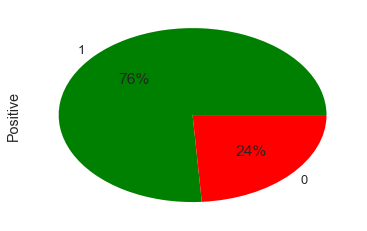

In [12]:
pie_textblob = df_textblob.Positive.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["green", "red"])

fig_textblob = pie_textblob.get_figure()
fig_textblob.savefig('/home/unina/PycharmProjects/Com_txt/Com_txt/data_folder/pie_textblob.png')


The output of sentiment analysis of textblob and the plots were saved in the `data folder`. 

## Naive Bayes \& Logistic Regression

### Multi-Nominal Naive Bayes
Navive Bayes is a binary classificarion in machine learning system. We can not fed the raw data (sequence of words) directly in our model, it needs numerical feature vector with a fixed size. This model is fast and simple to implement it.  

1- CountVectorizer --> Convert text into a matrix of token counts (bags-of-words approach)

2- TfidfVectorizer

In [60]:
##### CountVectorizer (vectoriser)
#Split data: train & test sets

X_train, X_test, y_train, y_test = train_test_split(df_textblob['Sentence'],df_textblob['Positive'], test_size= 0.20, random_state=0)

#######
# Vectorise text
vect_textblob = CountVectorizer(ngram_range = (1,2)).fit(X_train)#bigram
X_train_vectorized_count = vect_textblob.transform(X_train)

#######
#vect_textblob_tf = TfidfVectorizer(min_df=3, ngram_range = (1,2)).fit(X_train)
#X_train_vectorized_tf = vect_textblob_tf.transform(X_train) 
print('\nX_train shape:', X_train.shape)
print('\nX_train first entry: \n', X_train[1:2])

X_train_vectorized_count #Check to be sure.

#vect_textblob.get_feature_names() #get some of the vocabularies




X_train shape: (803,)

X_train first entry: 
 2645    new
Name: Sentence, dtype: object


<803x196 sparse matrix of type '<class 'numpy.int64'>'
	with 803 stored elements in Compressed Sparse Row format>

In [61]:
######Train model
model = MultinomialNB(alpha=0.1)
model.fit(X_train_vectorized_count, y_train)
predictions_count = model.predict(vect_textblob.transform(X_test))
#accuracy_score(y_test, predictions_count)
roc_auc_score(y_test, predictions_count)

0.803921568627451

In [62]:
##### TfidfVectorizer
# train model
model_W = MultinomialNB(alpha=0.1)
model_W.fit(X_train_vectorized_tf, y_train)
predictions_tfid = model_W.predict(vect_textblob_tf.transform(X_test))
#accuracy_score(y_test, predictions)

roc_auc_score(y_test, predictions_tfid)


0.6568627450980392

### Logistic Regression
1- CountVectorizer

2- TfidfVectorizer


In [19]:
##### CountVectorizer
#model_L = LogisticRegression()
#model_L.fit(X_train_vectorized_count, y_train)
#predictions_log = model_L.predict(vect_textblob.transform(X_test))
#accuracy_score(y_test, predictions_log)
#roc_auc_score(y_test, predictions_log) #Higher value = better classifier


0.6568627450980392

In [20]:
# vect_l = CountVectorizer(min_df=3, ngram_range = (1,2)).fit(X_train)
# X_train_vectorized = vect_l.transform(X_train)
# model = LogisticRegression()
# model.fit(X_train_vectorized, y_train)
# predictions_log = model.predict(vect_l.transform(X_test))
# accuracy_score(y_test, predictions_log)
# roc_auc_score(y_test, predictions_log)

0.6568627450980392

# Report

In [64]:
#####
print("Naive bayes")
print ("count"+classification_report(y_test, predictions_count))
print("AUC:")
print(roc_auc_score(y_test, predictions_count))
print(accuracy_score(y_test, predictions_count))
#####

print ("\n"+"TfId"+classification_report(y_test, predictions_tfid))
print("AUC:")
print(roc_auc_score(y_test, predictions_tfid))
print(accuracy_score(y_test, predictions_tfid))

#####
#print ("\n"+"Log"+classification_report(y_test, predictions_log))
#print("AUC:")
#print(roc_auc_score(y_test, predictions_log))
#print(accuracy_score(y_test, predictions_log))
#####
#print("\n"+"Logistic regression")

Naive bayes
count             precision    recall  f1-score   support

          0       1.00      0.61      0.76        51
          1       0.88      1.00      0.94       150

avg / total       0.91      0.90      0.89       201

AUC:
0.803921568627451
0.900497512437811

TfId             precision    recall  f1-score   support

          0       1.00      0.31      0.48        51
          1       0.81      1.00      0.90       150

avg / total       0.86      0.83      0.79       201

AUC:
0.6568627450980392
0.8258706467661692


In [37]:

#Train and evaluate the model
# vect = CountVectorizer().fit(X_train)
# X_train_vectorized = vect.transform(X_train)
# clfrNB = MultinomialNB(alpha = 0.1)
# clfrNB.fit(X_train_vectorized, y_train)
# preds = clfrNB.predict(vect.transform(X_test))
# score = accuracy_score(y_test, preds)

# print(score)
#0.9720812182741116



0.900497512437811


Prabhat, A., & Khullar, V. (2017, January). Sentiment classification on big data using Naïve bayes and logistic regression. In 2017 International Conference on Computer Communication and Informatics (ICCCI) (pp. 1-5). IEEE.

In this study, the result for logistic regression was higher than Naive Bayes, but in my study, I didn't find this difference so I skipped that part.

## - List of Positive and negative words

In [150]:
#####df_pos, df_neg

df_textblob_neg= df[df['Polarity'] < -0.1].Sentence
df_textblob_neg.to_csv(r'/home/unina/PycharmProjects/Com_txt/Com_txt/data_folder/df_textblob_neg.txt', header=None, index=None, sep='\n', mode='a')

df_textblob_pos= df[df['Polarity'] > 0.1].Sentence

df_textblob_pos.to_csv(r'/home/unina/PycharmProjects/Com_txt/Com_txt/data_folder/df_textblob_pos.txt', header=None, index=None, sep='\n', mode='a')


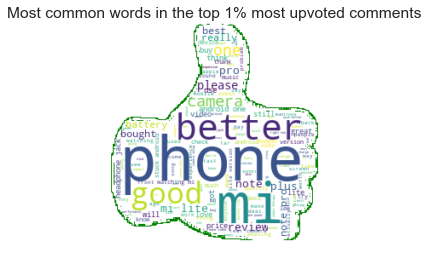

In [36]:
thumbs_up = np.array(Image.open("/home/unina/PycharmProjects/Com_txt/Com_txt/data_folder/thumbsup.png"))
wc = WordCloud(background_color="white", max_words=2000, margin=0,  width=2600,
               height=800, contour_width=1, contour_color='green', mask=thumbs_up, max_font_size=100,
               random_state=45).generate(my_corpus_textblob)

##### Show
#wc.to_file("/home/unina/PycharmProjects/Com_txt/Com_txt/data_folder/alice.png")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Most common words in the top comments')
plt.savefig("/home/unina/PycharmProjects/Com_txt/Com_txt/data_folder/corpus_wordcloud_textblob.png", format="png")
plt.show()    


## `Notes`:The larger the size of the word, more times it appears


<class 'pandas.core.frame.DataFrame'>
right best latest clean originally mostly really g


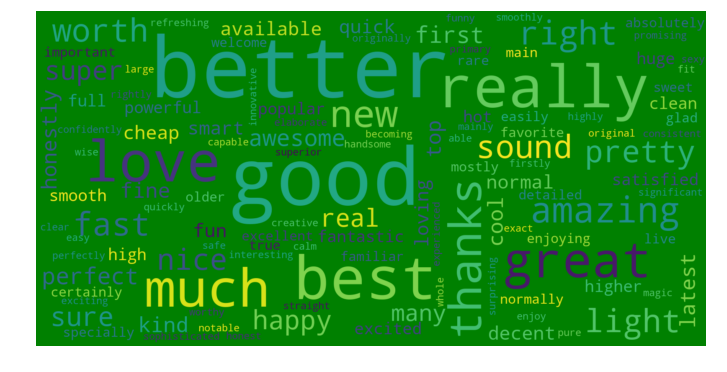

In [152]:
pos_you = df[df.Polarity > 0.1]
print(type(pos_you))
pos_word = []

for t in pos_you.Sentence:
    pos_word.append(t)
pos_word = pd.Series(pos_word).str.cat(sep=' ')

print(pos_word[:50])


######
wordcloud_pos = WordCloud(background_color = "green", width=1600, height=800,max_font_size=200).generate(pos_word)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.savefig('/home/unina/PycharmProjects/Com_txt/Com_txt/data_folder/Word_cloud_Positive_words.png')
plt.show()
plt.close()


<class 'pandas.core.frame.DataFrame'>
expensive average heavy everyday half heavily crap


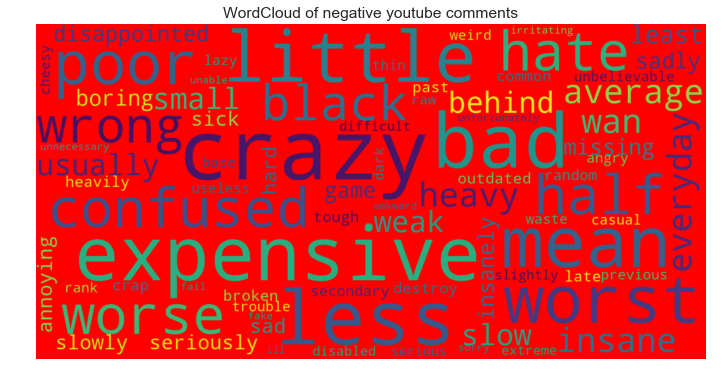

In [153]:
neg_you = df[df.Polarity < -0.1]
print(type(neg_you))
neg_word = []

for t in neg_you.Sentence:
    neg_word.append(t)
neg_word = pd.Series(neg_word).str.cat(sep=' ')

print(neg_word[:50])


######
wordcloud_neg = WordCloud(background_color = "red", width=1600, height=800,max_font_size=200).generate(neg_word)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.savefig('/home/unina/PycharmProjects/Com_txt/Com_txt/data_folder/Word_cloud_Negative_words.png')
plt.title("WordCloud of negative youtube comments")
plt.show()
plt.close()


#  VADER
*(Valence Aware Dictionary and sEntiment Reasoner)*

- Check the data with `Vader`: a rule-based sentiment analysis tool that works well for social media texts
- Vader: related to Positivity and Negativity score and also about how positive or negative a sentiment is.
- In the literature, it was mentioned that Vader works very well with emojis, punctuation mark, upper case text. So for this part, I use the data without removing the above stuff. 

In [30]:
#####
my_corpus_vader = open ("/home/unina/PycharmProjects/Com_txt/Com_txt/data_folder/my_corpus_vader.txt", "r", encoding = "utf-8-sig").read()
print(my_corpus_vader[:300])

🔥 Mi A is only right now limited 🔥 When cost a soul I think I will be switching to android for my next phone . Apple getting more expensive I bought mi a and here ' s my experience . ! ! ! comment on ever ! ! ! I bought version days ago I know it was n ' t a long time ago , but these are my . is the


In [26]:
######1. Remove http link ######
# my_corpus_path_sn = re.sub(r"[^a-z]*http://+/e/+\S +", "", my_corpus_path_s)
# my_corpus_path_sn = re.sub("[0-9]", "", my_corpus_path_s)
# my_corpus_v = my_corpus_path_sn.strip()
# print(len(my_corpus_v))
# print(my_corpus_v[:100])

In [31]:
######3. Remove stopwords ######
corpus_word_tokens_v = word_tokenize(my_corpus_vader)

######4. Remove abbriviations #######
list_abb = ["'m", "'s","'re","'ll", "n't",".", "im", "/", "''", '``', "$", "u", "e", "s"," + ", "'e'", "'"]
my_corpus_list_v = [" ".join([w for w in t.split() if not w in list_abb]) for t in corpus_word_tokens_v]
#print(my_corpus_list[:100])

######5. Join ######
my_corpus_join_v=  ' '.join(my_corpus_list_v)
print(my_corpus_join_v[10200:10800]+"\n"+"FIIIIIIINIIIIIISH")
print(len(my_corpus_join_v))

######6. Remove non English words #######

non_english_v = set(nltk.corpus.words.words())

my_corpus_clean_v = " ".join(w for w in nltk.wordpunct_tokenize(my_corpus_join_v) \
         if w.lower() in non_english_v or not w.isalpha())
print("STAAAAAAAART"+"\n"+my_corpus_clean_v[8000:8500])
print(len(my_corpus_clean_v))
print(type(my_corpus_clean_v))

 ? Thanks my next phone will probably be a , or  try note ai watched this and bought mi a not disappointed at all 👍 thank you Love , insanely cheap and good  I it and finally it today ... This is insane it   funny that the more budget A lite a notch on it If I buy this I  have to buy a M C type cord because i only have old on this price  and mi a are even % more expensive the for quality and affordable  Thanks you us how the other are  Can you please do a video on your music ? It   awesome ! I think  mean we have the @ : 🤔🤔 right Lewis ? ? would this work on band ? Easily the best phone for th
FIIIIIIINIIIIIISH
67101
STAAAAAAAART
ce point is great as is the device itself Keep up the good work ! This guy is like Cisco from Flash ... i love it Mine came in last week Really enjoying this phone so far Thanks for the it was really helpful Note pro please Also compare to f Watching this on my MI A ... Maybe on by Hong how about with stock ? still in love with my A , this brand is crazy good 

In [32]:
text_analyzer = SentimentIntensityAnalyzer()
sent_text = nltk.sent_tokenize(my_corpus_vader)
print(sent_text[:20])
#tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

['🔥 Mi A is only right now limited 🔥 When cost a soul I think I will be switching to android for my next phone .', "Apple getting more expensive I bought mi a and here ' s my experience .", '!', '!', '!', 'comment on ever !', '!', '!', "I bought version days ago I know it was n ' t a long time ago , but these are my .", 'is the best thing about this phone .', "It is a part of android one program you get latest , plus it clean android , which you get all , , phone , calculator , , originally from , and some which you do n ' t need to use or you can them .", 'In - design is mostly , I really like it .', 'Camera is very good , especially the front camera .', "I ' m not an person , but for an average user this camera is more than enough , I really like it .", 'Performance is excellent so far .', "I do n ' t play heavy , but I think it should handle it .", "For messenger , a lot , , and basic stuff , it ' s super fast .", 'Battery ...', 'I need to charge it every day .', 'I charge it when I

In [160]:
##### An example for emoji #####
def sentiment_sample_analyzer(sample):
    score = text_analyzer.polarity_scores(sample)
    print("{:-<20} {}".format(sample, str(score)))

        
######          
print(sentiment_sample_analyzer('😄'))
print(sentiment_sample_analyzer('I like it.'))
print(sentiment_sample_analyzer('I like it!!!'))
print(sentiment_sample_analyzer('amazing performance'))
print(sentiment_sample_analyzer('AMAZING performance'))

😄------------------- {'neg': 0.0, 'neu': 0.353, 'pos': 0.647, 'compound': 0.6705}
None
I like it.---------- {'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}
None
I like it!!!-------- {'neg': 0.0, 'neu': 0.229, 'pos': 0.771, 'compound': 0.5229}
None
amazing performance- {'neg': 0.0, 'neu': 0.208, 'pos': 0.792, 'compound': 0.5859}
None
AMAZING performance- {'neg': 0.0, 'neu': 0.181, 'pos': 0.819, 'compound': 0.6739}
None


In [33]:
vader_sent = []
for sentence in sent_text:
    print(sentence)
    score = text_analyzer.polarity_scores(sentence)
    for key in sorted(score):
        print("{0:} {1} ".format(key, score[key]), end='\n')#change it to tuple
        vader_sent.append((key, score[key], sentence))

🔥 Mi A is only right now limited 🔥 When cost a soul I think I will be switching to android for my next phone .
compound -0.6908 
neg 0.271 
neu 0.729 
pos 0.0 
Apple getting more expensive I bought mi a and here ' s my experience .
compound 0.0 
neg 0.0 
neu 1.0 
pos 0.0 
!
compound 0.0 
neg 0.0 
neu 0.0 
pos 0.0 
!
compound 0.0 
neg 0.0 
neu 0.0 
pos 0.0 
!
compound 0.0 
neg 0.0 
neu 0.0 
pos 0.0 
comment on ever !
compound 0.0 
neg 0.0 
neu 1.0 
pos 0.0 
!
compound 0.0 
neg 0.0 
neu 0.0 
pos 0.0 
!
compound 0.0 
neg 0.0 
neu 0.0 
pos 0.0 
I bought version days ago I know it was n ' t a long time ago , but these are my .
compound 0.0 
neg 0.0 
neu 1.0 
pos 0.0 
is the best thing about this phone .
compound 0.6369 
neg 0.0 
neu 0.588 
pos 0.412 
It is a part of android one program you get latest , plus it clean android , which you get all , , phone , calculator , , originally from , and some which you do n ' t need to use or you can them .
compound 0.4019 
neg 0.0 
neu 0.924 
pos 0.076

compound 0.4576 
neg 0.0 
neu 0.728 
pos 0.272 
plus This or the G Plus was thinking of the Mi A but the photo comparison does not look as good as the G plus ?
compound -0.4782 
neg 0.129 
neu 0.871 
pos 0.0 
?
compound 0.0 
neg 0.0 
neu 0.0 
pos 0.0 
Switch it to your daily driver !
compound 0.0 
neg 0.0 
neu 1.0 
pos 0.0 
I WILL GO FOR POCO F If it only had .. watching on my Mi A I almost went for this but went for a Poco because it ' s processor is insane Unbox therapy always quality .
compound -0.5499 
neg 0.109 
neu 0.891 
pos 0.0 
No not nice mi a Does works in on Mi A ?
compound -0.5472 
neg 0.393 
neu 0.607 
pos 0.0 
?
compound 0.0 
neg 0.0 
neu 0.0 
pos 0.0 
?
compound 0.0 
neg 0.0 
neu 0.0 
pos 0.0 
I got one and I love it might not change for or I like it so much Could you do a review on the G ?
compound 0.7717 
neg 0.0 
neu 0.729 
pos 0.271 
Very curious of what you think about it .
compound 0.3804 
neg 0.0 
neu 0.73 
pos 0.27 
Watching in my note pro ..😎😎 Make a video on y

compound 0.0 
neg 0.0 
neu 1.0 
pos 0.0 
I ' m loving the phone so far and is far superior to the s I had .
compound 0.8126 
neg 0.0 
neu 0.575 
pos 0.425 
is US !
compound 0.0 
neg 0.0 
neu 1.0 
pos 0.0 
!
compound 0.0 
neg 0.0 
neu 0.0 
pos 0.0 
Insert your I see this video from the mi a and this is the best phone ever !
compound 0.6696 
neg 0.0 
neu 0.757 
pos 0.243 
!
compound 0.0 
neg 0.0 
neu 0.0 
pos 0.0 
!
compound 0.0 
neg 0.0 
neu 0.0 
pos 0.0 
!
compound 0.0 
neg 0.0 
neu 0.0 
pos 0.0 
Here it but I still got it here in tech is too expensive I ' m watching this on A lite make a video on real Review .
compound 0.0 
neg 0.0 
neu 1.0 
pos 0.0 
plus Watching this on my note Pro love brand !
compound 0.6696 
neg 0.0 
neu 0.64 
pos 0.36 
!
compound 0.0 
neg 0.0 
neu 0.0 
pos 0.0 
i prefer nova i over this This is a seriously good device in the range .
compound 0.296 
neg 0.116 
neu 0.685 
pos 0.199 
is finally up a decent camera among mid - .
compound 0.0 
neg 0.0 
neu 1.0 
pos 0.

compound 0.4404 
neg 0.0 
neu 0.58 
pos 0.42 
note pro review please sir Hey do mi S / Y unbox Why do n ' t you do ?
compound 0.3182 
neg 0.0 
neu 0.839 
pos 0.161 
?
compound 0.0 
neg 0.0 
neu 0.0 
pos 0.0 
Real me pro is almost performance ... much better the price .. lower than up .. crazy to think that these at this price point would compete and beat some flagship of a few ago and even put up a fight with the new Does this work with at & t ?
compound -0.4404 
neg 0.135 
neu 0.785 
pos 0.08 
The camera setup is not + instead its + and both lens can be used manually .
compound 0.0 
neg 0.0 
neu 1.0 
pos 0.0 
The camera binning thing which in low light .
compound -0.2732 
neg 0.231 
neu 0.769 
pos 0.0 
Try the Note Pro .
compound 0.0 
neg 0.0 
neu 1.0 
pos 0.0 
Similar device , same price point .
compound 0.0 
neg 0.0 
neu 1.0 
pos 0.0 
But with a bigger battery and a headphone jack .
compound 0.0 
neg 0.0 
neu 1.0 
pos 0.0 
No Headphone jack sad If it was waterproof then yes , but it

compound 0.6249 
neg 0.0 
neu 0.328 
pos 0.672 
I may not buy the depending on the specs and stay with this .
compound 0.0 
neg 0.0 
neu 1.0 
pos 0.0 
I ' m in the U .
compound 0.0 
neg 0.0 
neu 1.0 
pos 0.0 
S .
compound 0.0 
neg 0.0 
neu 0.0 
pos 0.0 
on T - Mobile if anyone is curious .
compound 0.3182 
neg 0.0 
neu 0.685 
pos 0.315 
check mi mix Are n ' t there any or customs in Canada / when from ?
compound 0.0 
neg 0.0 
neu 1.0 
pos 0.0 
Here in I would pay € more for the Mi A .
compound -0.1027 
neg 0.167 
neu 0.833 
pos 0.0 
So € instead of € , which is a lot for the Mi A .
compound 0.0 
neg 0.0 
neu 1.0 
pos 0.0 
: NO IN US DO N ' T BUY .
compound -0.296 
neg 0.355 
neu 0.645 
pos 0.0 
I REPEAT , NO IN THE US , DO NOT BUY .
compound -0.296 
neg 0.239 
neu 0.761 
pos 0.0 
He really should have it , it is trap for US .
compound -0.3182 
neg 0.204 
neu 0.796 
pos 0.0 
It ' s not + camera it is + camera setup !
compound 0.0 
neg 0.0 
neu 1.0 
pos 0.0 
Unbox therapy make mistake .😀

The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between.

--> -1(most extreme negative)  \& +1 (most extreme positive).

In [34]:
print(vader_sent[:10])
print(type(vader_sent))

[('compound', -0.6908, '🔥 Mi A is only right now limited 🔥 When cost a soul I think I will be switching to android for my next phone .'), ('neg', 0.271, '🔥 Mi A is only right now limited 🔥 When cost a soul I think I will be switching to android for my next phone .'), ('neu', 0.729, '🔥 Mi A is only right now limited 🔥 When cost a soul I think I will be switching to android for my next phone .'), ('pos', 0.0, '🔥 Mi A is only right now limited 🔥 When cost a soul I think I will be switching to android for my next phone .'), ('compound', 0.0, "Apple getting more expensive I bought mi a and here ' s my experience ."), ('neg', 0.0, "Apple getting more expensive I bought mi a and here ' s my experience ."), ('neu', 1.0, "Apple getting more expensive I bought mi a and here ' s my experience ."), ('pos', 0.0, "Apple getting more expensive I bought mi a and here ' s my experience ."), ('compound', 0.0, '!'), ('neg', 0.0, '!')]
<class 'list'>


## - Dataframe_VADER

In [35]:

df_vader = pd.DataFrame(vader_sent, columns = ['sen', 'Polarity','Sentence'])
print("Dataframe : " , df_vader, sep='\n')
df_vader = df_vader[df_vader['Polarity'] != 0]#Drop the neutral from the dataset
df_vader.to_csv('/home/unina/PycharmProjects/Com_txt/Com_txt/data_folder/output_VADER.csv', sep='\t', index=False, header=True)

Dataframe : 
           sen  Polarity                                           Sentence
0     compound   -0.6908  🔥 Mi A is only right now limited 🔥 When cost a...
1          neg    0.2710  🔥 Mi A is only right now limited 🔥 When cost a...
2          neu    0.7290  🔥 Mi A is only right now limited 🔥 When cost a...
3          pos    0.0000  🔥 Mi A is only right now limited 🔥 When cost a...
4     compound    0.0000  Apple getting more expensive I bought mi a and...
5          neg    0.0000  Apple getting more expensive I bought mi a and...
6          neu    1.0000  Apple getting more expensive I bought mi a and...
7          pos    0.0000  Apple getting more expensive I bought mi a and...
8     compound    0.0000                                                  !
9          neg    0.0000                                                  !
10         neu    0.0000                                                  !
11         pos    0.0000                                                  !

In [98]:
df_vader_pos= df_vader[df_vader['sen']== "pos"].Sentence
#print(df_vader_pos[1:10])
df_vader_pos.to_csv(r'/home/unina/PycharmProjects/Com_txt/Com_txt/data_folder/df_vader_pos.txt', header=None, index=None, sep='\n', mode='a')
df_vader_neg= df_vader[df_vader['sen']== "neg"].Sentence
df_vader_neg.to_csv(r'/home/unina/PycharmProjects/Com_txt/Com_txt/data_folder/df_vader_neg.txt', header=None, index=None, sep='\n', mode='a')

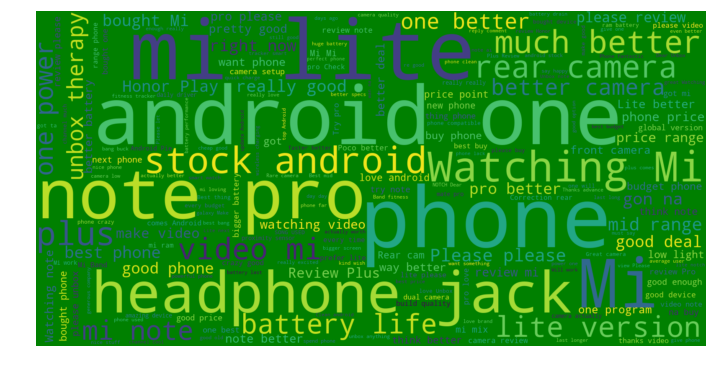

In [100]:
vader_pos= open ("/home/unina/PycharmProjects/Com_txt/Com_txt/data_folder/df_vader_pos.txt", "r", encoding = "utf-8-sig").read()

wordcloud_vader_pos = WordCloud(background_color = "green", width=1600, height=800,max_font_size=200).generate(vader_pos)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud_vader_pos, interpolation="bilinear")
plt.axis("off")
#plt.savefig('/home/unina/PycharmProjects/Com_txt/Com_txt/data_folder/Word_cloud_Positive_words_vader_pos.png')
plt.show()
plt.close()


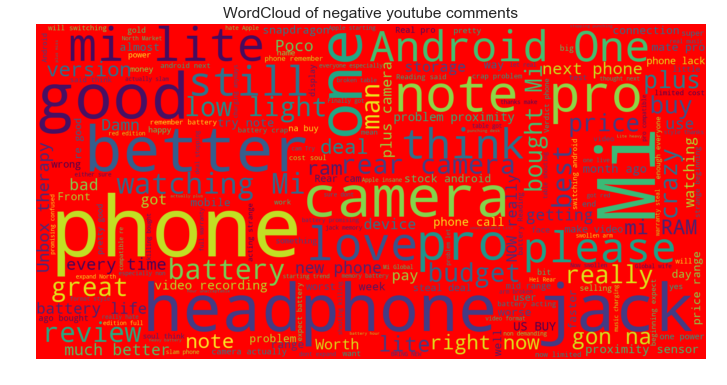

In [96]:
vader_neg= open ("/home/unina/PycharmProjects/Com_txt/Com_txt/data_folder/df_vader_neg.txt", "r", encoding = "utf-8-sig").read()



######
wordcloud_vader_neg = WordCloud(background_color = "red", width=1600, height=800,max_font_size=200).generate(vader_neg)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud_vader_neg, interpolation="bilinear")
plt.axis("off")
#plt.savefig('/home/unina/PycharmProjects/Com_txt/Com_txt/data_folder/Word_cloud_Negative_words_vader.png')
plt.title("WordCloud of negative youtube comments")
plt.show()
plt.close()


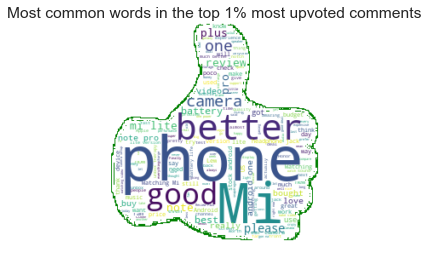

In [89]:
thumbs_up_vader = np.array(Image.open("/home/unina/PycharmProjects/Com_txt/Com_txt/data_folder/thumbsup.png"))
wc_vader = WordCloud(background_color="white", max_words=2000, margin=0,  width=2600,
               height=800, contour_width=1, contour_color='green', mask=thumbs_up_vader, max_font_size=100,
               random_state=45).generate(my_corpus_vader)

##### Show
#wc.to_file("/home/unina/PycharmProjects/Com_txt/Com_txt/data_folder/alice.png")
plt.imshow(wc_vader, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Most common words in the comments')
#plt.savefig("/home/unina/PycharmProjects/Com_txt/Com_txt/data_folder/corpus_wordcloud_vader.png", format="png")
plt.show()    


`End`: Although textblob removed a lot of words from my corpus, but in wordcloud, textblob visualization looks better than Vader. 
My future plan is to compare these result with BERT if BERT works well with social media texts. Because the current studies used it in more wikipedia texts format. 

In [84]:
#Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(df_vader['Sentence'],df_vader['Polarity'], test_size= 0.20, random_state=0)

#######
# Vectorise text
vect_vader = CountVectorizer(ngram_range = (1,2)).fit(X_train)#bigram
X_train_vectorized_count_vader = vect_vader.transform(X_train)

#######


#vect_textblob.get_feature_names() #get some of the vocabularies

print('X_train first entry: \n\n', X_train[1:3])
print('\n\nX_train shape: ', X_train.shape)
#####

X_train_vectorized_count_vader #Check to be sure.


X_train first entry: 

 3270    Lew is beginning to like X This a camera I am ...
4457    always watch your and i want a powerful phone ...
Name: Sentence, dtype: object


X_train shape:  (1872,)


<1872x7982 sparse matrix of type '<class 'numpy.int64'>'
	with 48733 stored elements in Compressed Sparse Row format>